# WQU Msc Financial Engineering Financial Data GWP 2

### Money at a fixed rate for an unsecured purchase: 

Datasets to obtain: 
1. Credit Card Default Rates in the US for the past 8 years.
2. Historical Debt-Income Ratios of Credit Card Clients in The US for the past 8 Years. 

In [26]:
#import dependencies 
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### Fetch The Data:

Since the credit default data is not available on Yahoo Finance, we will download the datasets using Pandas Datareader, using the FRED API. 

In [8]:
#import the credit default data: 

# Define the date range
start = datetime(2016, 1, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
credit_card_defaults_df = web.DataReader('DRCCLACBS', 'fred', start, end)

credit_card_defaults_df.reset_index(inplace=True)
credit_card_defaults_df.head(2)


,DATE,DRCCLACBS
0,2016-01-01,2.14
1,2016-04-01,2.21


In [9]:
#import historical debt service payments to income in the US

# Define the date range
start = datetime(2016, 1, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
debt_income_df = web.DataReader('TDSP', 'fred', start, end)

debt_income_df.reset_index(inplace=True)
debt_income_df.head(2)

,DATE,TDSP
0,2016-01-01,11.763075
1,2016-04-01,11.765966


In [14]:
#combine the three dataframes into one dataframe for analysis

combined_df = credit_card_defaults_df.copy()
combined_df.rename(columns={'DRCCLACBS': 'credit_default_rate'}, inplace=True)
combined_df['debt_income_ratio'] = debt_income_df['TDSP']
combined_df.head(2)

,DATE,credit_default_rate,debt_income_ratio
0,2016-01-01,2.14,11.763075
1,2016-04-01,2.21,11.765966


### Analyze the Data:

In [15]:
combined_df[['credit_default_rate', 'debt_income_ratio']].describe()

,credit_default_rate,debt_income_ratio
count,34.000000,34.000000
mean,2.370000,11.137773
std,0.433037,0.738567
min,1.540000,9.095642
25%,2.117500,10.717774
50%,2.465000,11.528270
75%,2.580000,11.709283
max,3.250000,11.865676


#### 1. Credit Default Rates:

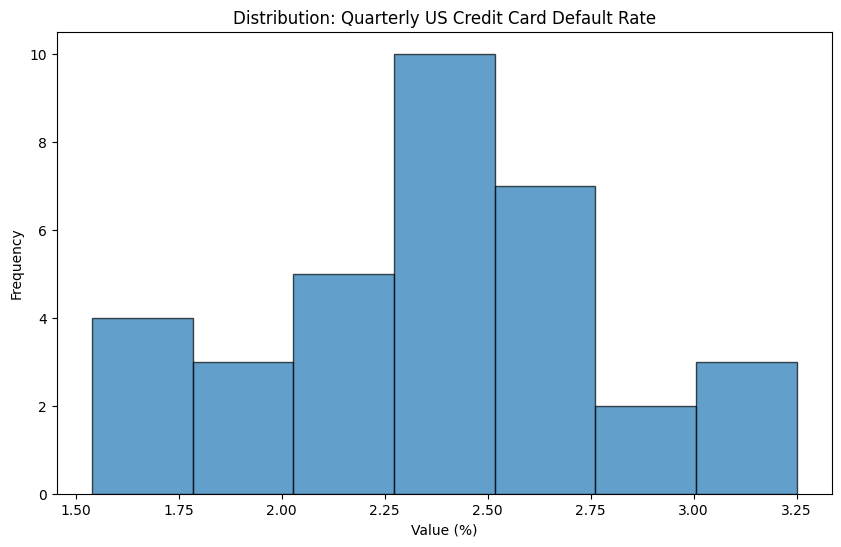

In [17]:
# Analyze the distribution of the credit default rates

plt.figure(figsize=(10, 6))
plt.hist(combined_df['credit_default_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly US Credit Card Default Rate')
plt.xlabel('Value (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above graph shows the distribution of the quarterly average credit card default rate for the United States.  This shows us that on average the credit card default rate is somewhere between 1.5% - 3.25% with the most common default rate between 2.25% - 2.50%. 


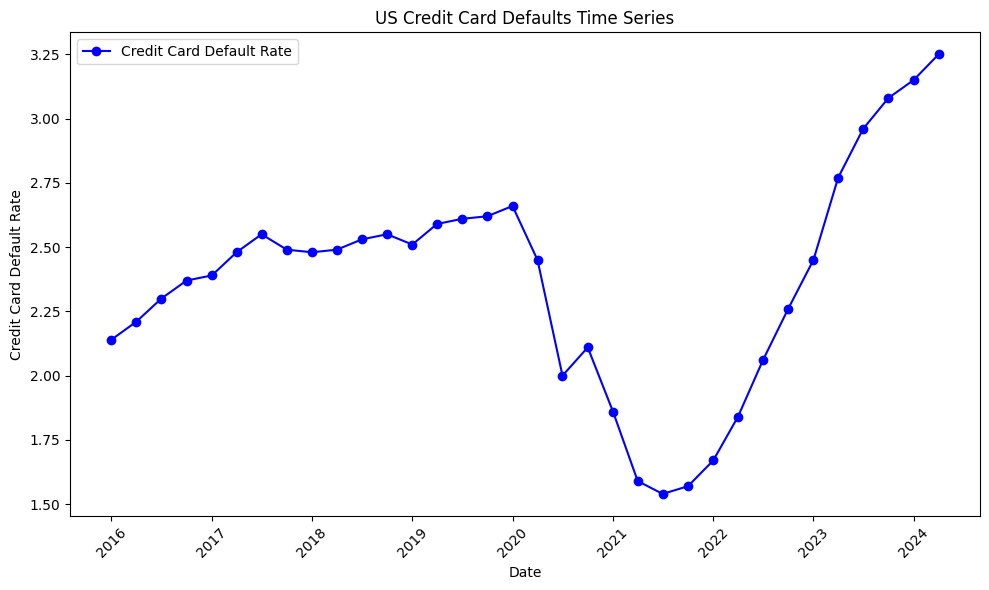

In [211]:
# Analyze the US credit card default rates over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['credit_default_rate'], marker='o', color='blue', label='Credit Card Default Rate')

# Add titles and labels
plt.title('US Credit Card Defaults Time Series')
plt.xlabel('Date')
plt.ylabel('Credit Card Default Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The time series plot above shows that credit card default rates have increased dramatically in recent months, which would indicate that there is currently a large risk in offering unsecured loans. 


#### 2. Debt to Income Ratio:

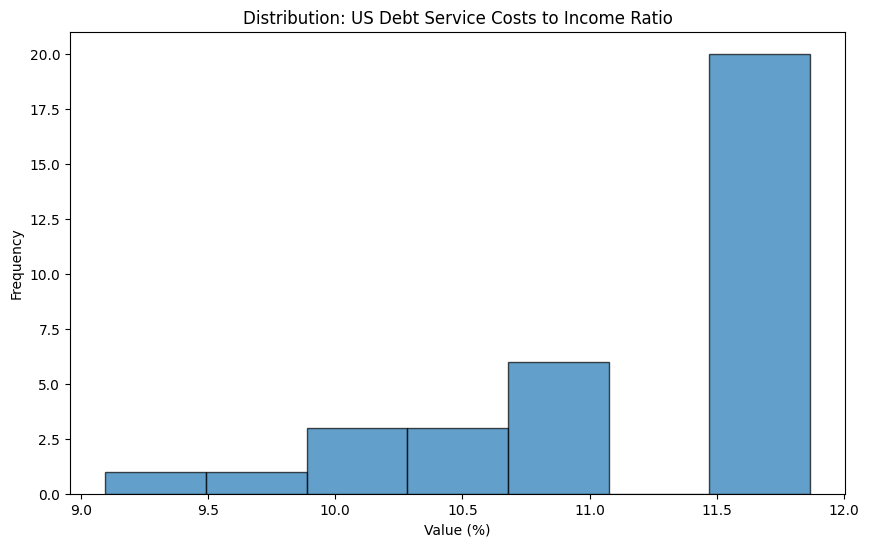

In [20]:
#Analyze the distribution of the US Prime Lending Rate per quarter 

plt.figure(figsize=(10, 6))
plt.hist(combined_df['debt_income_ratio'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: US Debt Service Costs to Income Ratio')
plt.xlabel('Value (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution plot shows that the debt costs to income ratio data is extremely skewed with the majority of values ranging from 11.5% to 12%. The long left tail however shows that there can be some volatility and extreme values on the lower end of the scale, which implies that this figure could be difficult to predict or forecast. 


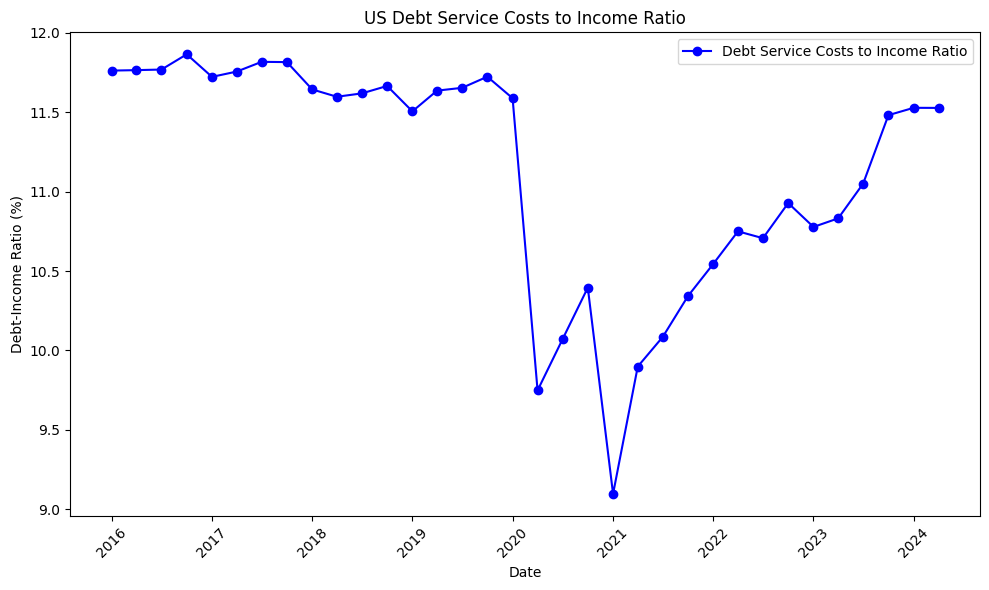

In [24]:
# Analyze the US prime lending rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['debt_income_ratio'], marker='o', color='blue', label='Debt Service Costs to Income Ratio')

# Add titles and labels
plt.title('US Debt Service Costs to Income Ratio')
plt.xlabel('Date')
plt.ylabel('Debt-Income Ratio (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The above time series plot shows that the debt to income ratio of US households has risen quite sharply since covid. This is to be expected as globally we have experienced a high interest rate environment. This could imply that now is a particularly risky time to be issuing unsecured debt as consumers are already highly leveraged and could be operating outside of their means. 

#### Relationship Between Credit Defaults and Debt to Income Ratio (Leverage):

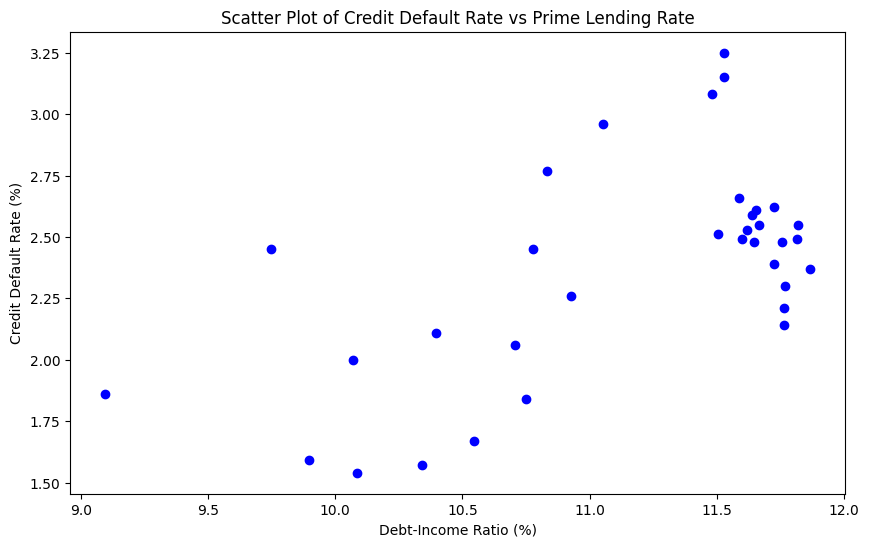

In [28]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['debt_income_ratio'], combined_df['credit_default_rate'], color='blue', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Credit Default Rate vs Prime Lending Rate')
plt.xlabel('Debt-Income Ratio (%)')
plt.ylabel('Credit Default Rate (%)')
plt.grid(visible=False)

# Show the plot
plt.show()


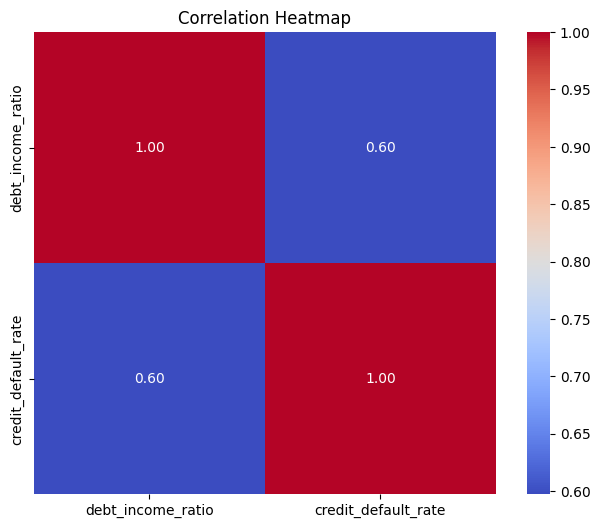

In [27]:
# Calculate the correlation matrix
correlation_matrix = combined_df[['debt_income_ratio', 'credit_default_rate']].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Title and show the plot
plt.title('Correlation Heatmap')
plt.show()

The above scatter plot and accompanying correlation heatmap shows that there is a moderate, positive correlation between debt to income ratios for US customers and credit card default rates. This shows that although debt to income ratios can be a strong predictor of credit default rates, additional data sources may be required for making more accurate predictions. 

### Publicly Traded Bond: 

#### Datasets to obtain: 
1. Historical Performance of Bloomberg Barclays U.S. Aggregate Bond Index for the past 8 years. 
2. Historical inflation rates in the US for the past 8 years.
3. Historical economic growth rates in the US for the past 8 years. 

#### Fetch The Data:


In [39]:
# List of S&P 500 tickers (for simplicity, a small list of example tickers)
sp500_tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'TSLA']

# Function to get leverage ratio (Debt-to-Equity) from quarterly financials
def get_quarterly_leverage_ratio(ticker):
    # Fetch the stock's data
    stock = yf.Ticker(ticker)
    
    # Fetch the quarterly balance sheet data
    balance_sheet = stock.quarterly_balance_sheet
    
    # Check if balance sheet contains the necessary data
    if 'Long Term Debt' not in balance_sheet.index or 'Total Stockholder Equity' not in balance_sheet.index:
        return None
    
    # Get total debt (Long Term Debt + Short Term Debt)
    total_debt = balance_sheet.loc['Long Term Debt'] + balance_sheet.loc['Short Long Term Debt']
    
    # Get total equity (Total Stockholder Equity)
    total_equity = balance_sheet.loc['Total Stockholder Equity']
    
    # Calculate leverage ratio (Debt-to-Equity)
    leverage_ratio = total_debt / total_equity
    print(leverage_data)
    return leverage_ratio

# Create an empty dictionary to store leverage ratios for each company
leverage_data = {}

# Fetch leverage ratios for all companies in the list
for ticker in sp500_tickers:
    leverage_data[ticker] = get_quarterly_leverage_ratio(ticker)
    print(get_quarterly_leverage_ratio(ticker))
# Convert the leverage ratios into a DataFrame for better visualization
#leverage_data

# Print the DataFrame to see the leverage ratios
#print(leverage_df)



None
None
None
None
None
None


In [47]:
# Fetch the stock's data
stock = yf.Ticker('AAPL')
    
# Fetch the quarterly balance sheet data
balance_sheet = stock.quarterly_balance_sheet


In [51]:
import yfinance as yf
import pandas as pd

# 1. Function to get Debt-to-Equity ratio for a given ticker
def get_debt_to_equity_ratio(ticker):
    stock = yf.Ticker(ticker)
    
    # Attempt to get the debt-to-equity ratio from the 'info' field
    info = stock.info
    if 'debtToEquity' in info:
        return info['debtToEquity']
    
    # If not available in 'info', calculate it from the balance sheet
    balance_sheet = stock.balance_sheet
    if 'Long Term Debt' not in balance_sheet.index or 'Total Stockholder Equity' not in balance_sheet.index:
        print(f"Missing data for {ticker}")
        return None
    
    long_term_debt = balance_sheet.loc['Long Term Debt']
    short_term_debt = balance_sheet.loc.get('Short Long Term Debt', 0)  # Default to 0 if missing
    total_debt = long_term_debt + short_term_debt
    
    total_equity = balance_sheet.loc['Total Stockholder Equity']
    
    if total_equity == 0 or pd.isna(total_equity):
        print(f"Total equity is zero or missing for {ticker}")
        return None
    
    debt_to_equity_ratio = total_debt / total_equity
    return debt_to_equity_ratio

# 2. Function to get Debt-to-Equity ratios for a list of tickers
def get_debt_to_equity_for_multiple_tickers(tickers):
    de_ratios = {}

    for ticker in tickers:
        print(f"Fetching Debt-to-Equity for {ticker}...")
        de_ratio = get_debt_to_equity_ratio(ticker)
        if de_ratio is not None:
            de_ratios[ticker] = de_ratio
    
    # Convert results into a DataFrame for better visualization
    de_ratios_df = pd.DataFrame.from_dict(de_ratios, orient='index', columns=['Debt-to-Equity Ratio'])
    return de_ratios_df

# 3. Example list of S&P 500 tickers (can be replaced with your own list)
tickers = [
    "MMM",  # 3M
    "AXP",  # American Express
    "AMGN",  # Amgen
    "AAPL",  # Apple
    "BA",  # Boeing
    "CAT",  # Caterpillar
    "CVX",  # Chevron
    "CSCO",  # Cisco Systems
    "KO",  # Coca-Cola
    "DIS",  # Disney
    "DOW",  # Dow
    "GS",  # Goldman Sachs
    "HD",  # Home Depot
    "HON",  # Honeywell
    "IBM",  # IBM
    "INTC",  # Intel
    "JNJ",  # Johnson & Johnson
    "JPM",  # JP Morgan Chase
    "MCD",  # McDonald's
    "MRK",  # Merck
    "MSFT",  # Microsoft
    "NKE",  # Nike
    "PG",  # Procter & Gamble
    "CRM",  # Salesforce
    "TRV",  # Travelers
    "UNH",  # UnitedHealth
    "V",  # Visa
    "WBA",  # Walgreens
    "WMT"  # Walmart
]
  # List of tickers (example, use the actual list of your choice)

# 4. Get Debt-to-Equity ratios for the provided tickers
debt_to_equity_df = get_debt_to_equity_for_multiple_tickers(tickers)

# Display the results
print(debt_to_equity_df)

# Optionally, save the results to a CSV file
#debt_to_equity_df.to_csv('debt_to_equity_ratios.csv')



Fetching Debt-to-Equity for MMM...
Fetching Debt-to-Equity for AXP...
Fetching Debt-to-Equity for AMGN...
Fetching Debt-to-Equity for AAPL...
Fetching Debt-to-Equity for BA...
Missing data for BA
Fetching Debt-to-Equity for CAT...
Missing data for CAT
Fetching Debt-to-Equity for CVX...
Fetching Debt-to-Equity for CSCO...
Fetching Debt-to-Equity for KO...
Fetching Debt-to-Equity for DIS...
Fetching Debt-to-Equity for DOW...
Fetching Debt-to-Equity for GS...
Fetching Debt-to-Equity for HD...
Fetching Debt-to-Equity for HON...
Fetching Debt-to-Equity for IBM...
Fetching Debt-to-Equity for INTC...
Fetching Debt-to-Equity for JNJ...
Fetching Debt-to-Equity for JPM...
Missing data for JPM
Fetching Debt-to-Equity for MCD...
Missing data for MCD
Fetching Debt-to-Equity for MRK...
Fetching Debt-to-Equity for MSFT...
Fetching Debt-to-Equity for NKE...
Fetching Debt-to-Equity for PG...
Fetching Debt-to-Equity for CRM...
Fetching Debt-to-Equity for TRV...
Fetching Debt-to-Equity for UNH...
Fetchin

In [8]:
#Get US Inflation Data from the FED
# Set the start and end dates
start_date = '2016-01-01'
end_date = '2024-03-31'

# Fetch the CPI data from FRED
cpi_data_df = pd.DataFrame(web.get_data_fred('MEDCPIM158SFRBCLE', start=start_date, end=end_date))

# Resample to quarterly and calculate inflation rate
cpi_data_df = cpi_data_df.resample('Q').mean().reset_index()
cpi_data_df.head(2)


,DATE,MEDCPIM158SFRBCLE
0,2016-03-31,2.489379
1,2016-06-30,3.069796


In [9]:
#Get US economic growth rates from FRED

# Set the start date
start_date = '2016-1-1'

# Fetch the Real GDP data from FRED
gdp_data = web.get_data_fred('GDP', start=start_date)

# Calculate GDP growth rates (quarter-over-quarter)
gdp_growth_rate_df = gdp_data.pct_change() * 100  # Convert to percentage

# Display the quarterly GDP growth rates
gdp_growth_rate_df = gdp_growth_rate_df.iloc[1:].reset_index()
gdp_growth_rate_df.head(2)


,DATE,GDP
0,2016-04-01,1.002751
1,2016-07-01,0.966972


In [10]:
#combine the three dataframes into one dataframe for analysis

combined_df = bond_index_df.copy()
combined_df.rename(columns={'Close': 'bond_index_close'}, inplace=True)
combined_df['inflation_rate'] = cpi_data_df['MEDCPIM158SFRBCLE']
combined_df['gdp_growth'] = gdp_growth_rate_df['GDP']
combined_df.head(2)

,Date,bond_index_close,inflation_rate,gdp_growth
0,2016-03-31,109.438196,2.489379,1.002751
1,2016-06-30,111.045781,3.069796,0.966972


#### Analyze the Data:

In [222]:
combined_df[['bond_index_close','inflation_rate','gdp_growth']].describe()

,bond_index_close,inflation_rate,gdp_growth
count,33.000000,33.000000,33.000000
mean,108.210400,3.624810,1.355426
std,6.643833,1.667292,2.271833
min,95.166032,1.519074,-8.261898
25%,104.891429,2.577022,0.999011
50%,109.343492,2.881012,1.329796
75%,112.687500,4.260233,1.749353
max,118.622187,7.507740,8.710313


#### Bond Prices: 

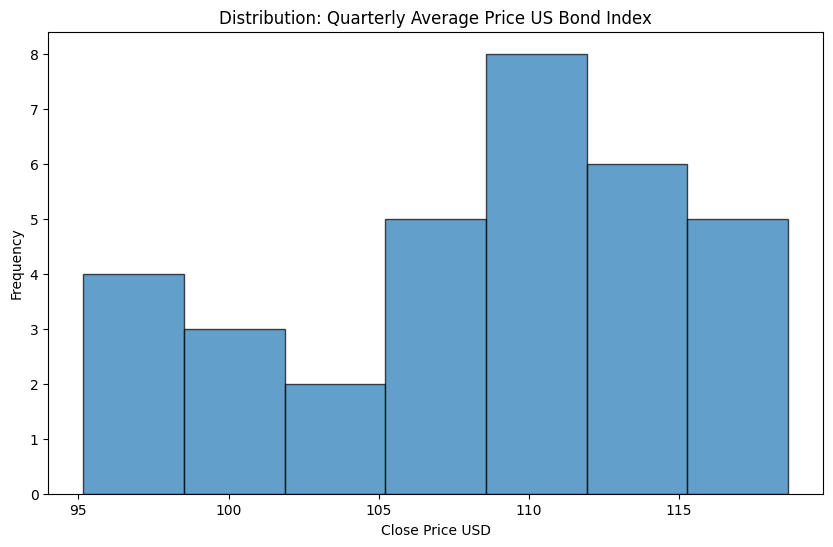

In [223]:
# Analyze the distribution of the US Bond Close Prices

plt.figure(figsize=(10, 6))
plt.hist(combined_df['bond_index_close'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly Average Price US Bond Index')
plt.xlabel('Close Price USD')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution shows us that the bond prices for US Bonds are not normally distributed, but rather follow a bimodal distribution. This is an important insight in determining methods for forecasting expected returns. The distribution also shows that bond prices are not very volatile, which can reduce some of the risk associated with investing in this type of asset. 

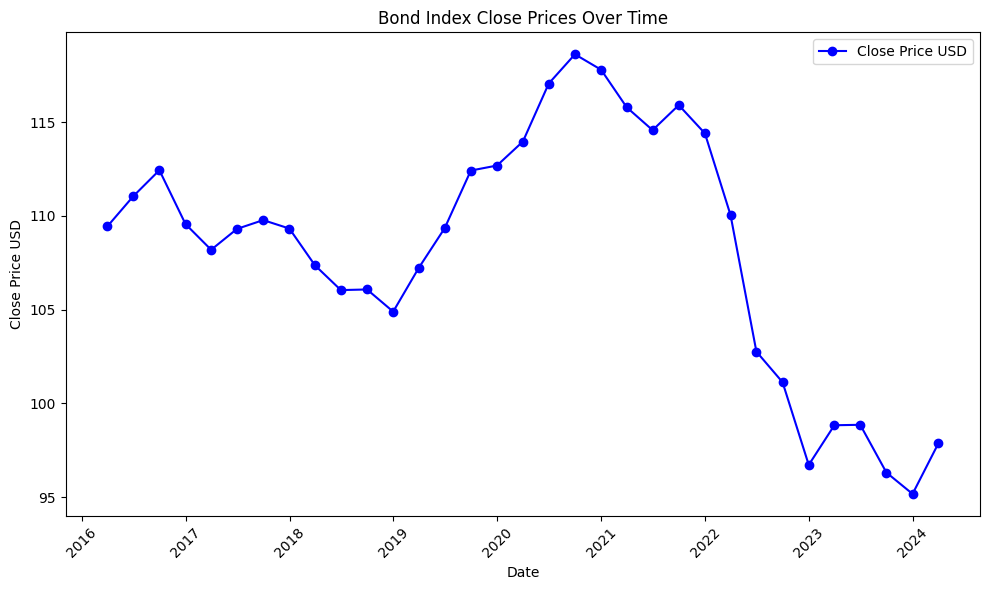

In [224]:
# Analyze the US Bond Prices over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.Date, combined_df['bond_index_close'], marker='o', color='blue', label='Close Price USD')

# Add titles and labels
plt.title('Bond Index Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The above time series plot for the US Bond Index shows that bond prices have fallen quite significantly in recent periods. This is inline with expectations, given the high interest rate environment that currently exists globally. This insight is important because it allows us to assess our entry position in the bond market as well as understand global trends which are currently in motion. 

#### Inflation Rate: 

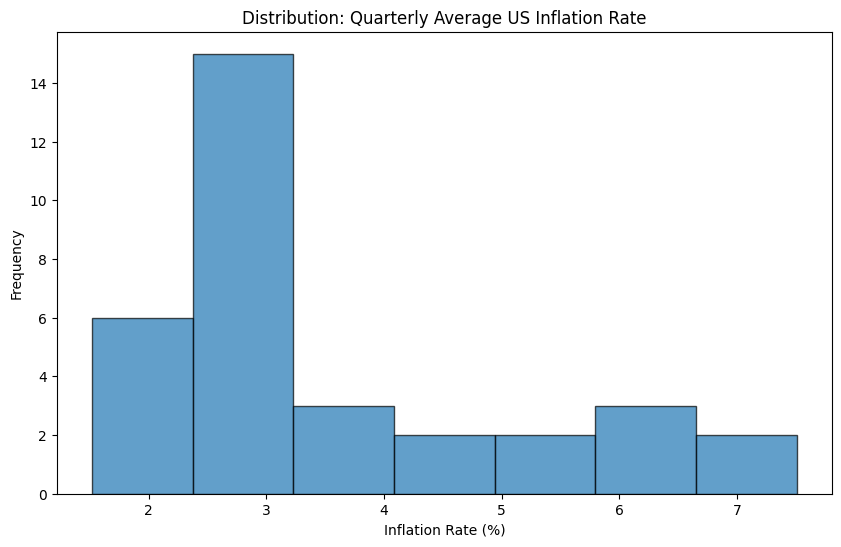

In [225]:
# Analyze the distribution of the US Inflation Rates

plt.figure(figsize=(10, 6))
plt.hist(combined_df['inflation_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly Average US Inflation Rate')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution plot shows that inflation in the US can be quite volatile, having a large range > 6%. The data is also quite skewed to the right indicating the presence of outlier quarters. This volatility is important to anticipate due to the impact it can have on forecasting returns. 

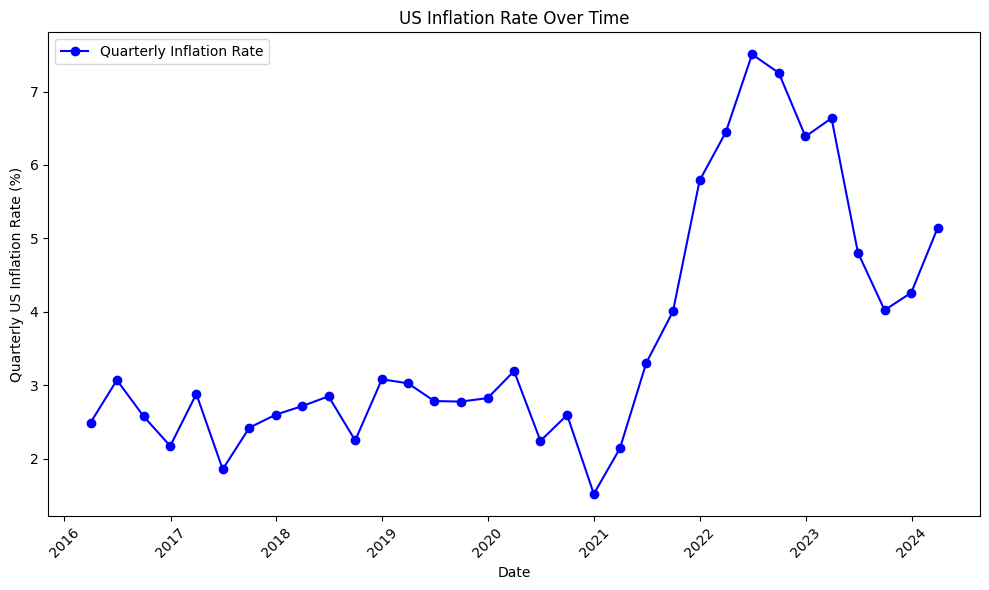

In [226]:
# Analyze the US Inflation Rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.Date, combined_df['inflation_rate'], marker='o', color='blue', label='Quarterly Inflation Rate')

# Add titles and labels
plt.title('US Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Quarterly US Inflation Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The above time series plot shows that in recent periods, inflation in the US has risen rapidly and sits way above historical averages. It is important to understand this inflation trend, because inflation rates can have an impact on the prices and profitability of bonds and thus play an important role in assessing the risk associated with bond products. 

#### Economic Growth Rate: 

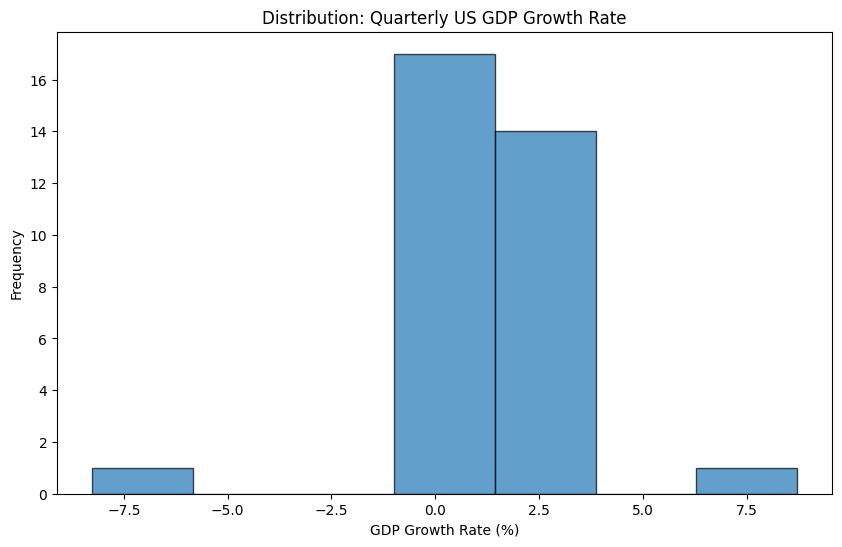

In [227]:
# Analyze the distribution of the US Economic Growth Rates

plt.figure(figsize=(10, 6))
plt.hist(combined_df['gdp_growth'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly US GDP Growth Rate')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

The above distribution plot shows that economic growth rates in the US are fairly stable between 0 and 3%. It also however shows that shocks can occur in the economy which has caused the presence of outliers which can be seen from the distribution plot. These outlier periods can have an impact on bond prices and need to be accounted for when assessing risk. 

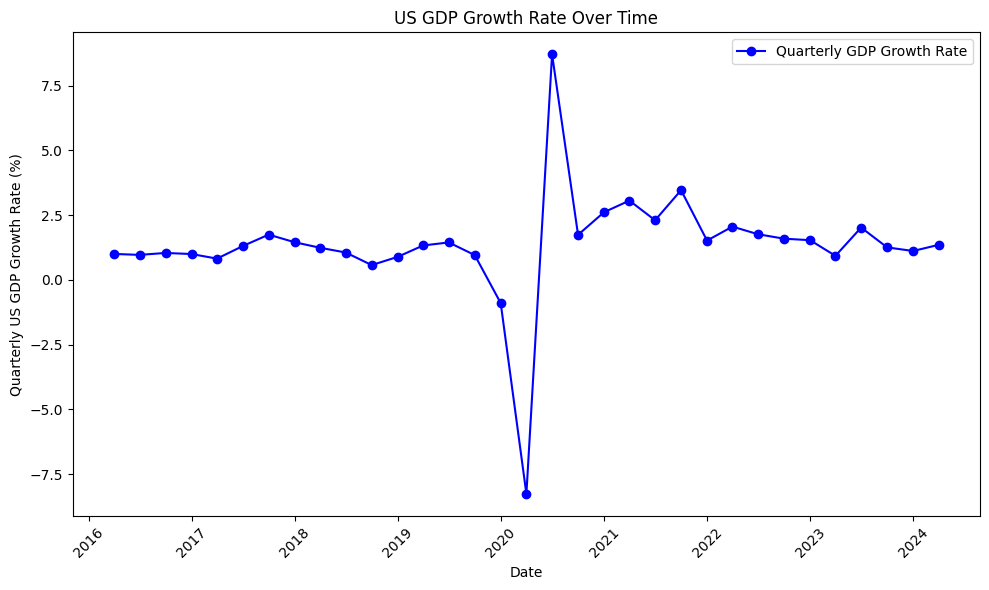

In [228]:
# Analyze the US GDP Growth Rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.Date, combined_df['gdp_growth'], marker='o', color='blue', label='Quarterly GDP Growth Rate')

# Add titles and labels
plt.title('US GDP Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Quarterly US GDP Growth Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The above time series plot shows that the US GDP growth has been relatively stable throughout recent history, however the effects of economic shocks such as Covid are clearly visible. Since these shocks will have an impact on bond prices in the US it is important to be aware of the potential impact they can have on the economy.  

#### Correlation Analysis: 

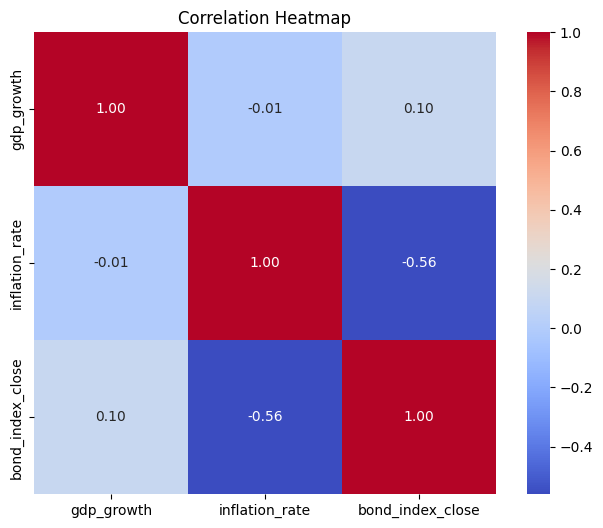

In [229]:

# Calculate the correlation matrix
correlation_matrix = combined_df[['gdp_growth', 'inflation_rate', 'bond_index_close']].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Title and show the plot
plt.title('Correlation Heatmap')
plt.show()

The above heatmap shows that there is a moderate, negative correlation between the inflation rate in the US and the bond price index. This confirms our initial concern around how changes in inflation and interest rates in the US may affect bond prices. 